# Regular Plots

[Matplotlib Tutorial#Regular Plots](http://www.labri.fr/perso/nrougier/teaching/matplotlib/#regular-plots)

In [1]:
# Imports
import numpy as np
import pandas as pd
import altair as alt

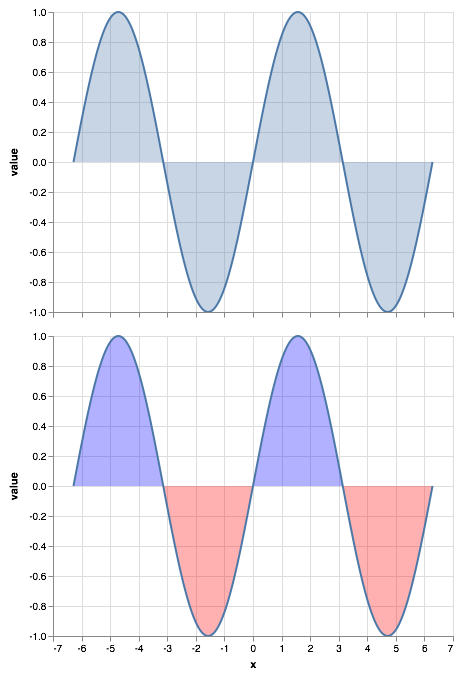

In [9]:
# Create Data
x = np.linspace(-2*np.pi, 2*np.pi, 256, endpoint=True)
s = np.sin(x)
df = pd.DataFrame({'x':x, 'sine':s}).melt('x')
df.columns = ['x', 'series', 'value']

# Make Chart
chart = alt.Chart()
chart = chart.transform_calculate(
    region='datum.x <= -PI ? 0 : (datum.x <= 0 ? 1 : (datum.x <= PI ? 2 : 3))'
)
encoding = {'x':alt.X('x', axis={'title': None, 'labels': False}), 'y':'value'}
# Use the default blue for the first chart
chart_area = chart.mark_area(fillOpacity=0.3).encode(**encoding)
chart_line = chart.mark_line().encode(**encoding)
chart1 = alt.layer(chart_area, chart_line)

encoding = {'x':'x', 'y':'value'}
color_encoding = alt.Color('region:N', legend=None, scale=alt.Scale(range=['blue', 'red']))
chart_area = chart.mark_area(fillOpacity=0.3).encode(color_encoding, **encoding)
chart_line = chart.mark_line().encode(**encoding)
chart2 = alt.layer(chart_area, chart_line)
alt.vconcat(chart1, chart2, data=df)